In [3]:
import mlrose_hiive
import numpy as np

from mlrose_hiive import FlipFlopGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner
from matplotlib import pyplot as plt
from numpy import inf
import time

In [4]:
# Generate a new TSP problem using a fixed seed.
problem_fit = FlipFlopGenerator().generate(seed=123456, size=20)

In [3]:
# Solve problem using the genetic algorithm
#GA POPSIZE = 200
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=200)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.36766862869262695
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
19.0


In [14]:
#GA POPSIZE = 250
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=250)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.5473611354827881
[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
19.0


In [15]:
curve_GA = fitness_curve_pro
fitness_GA = best_fitness
time_GA = end-start

In [6]:
#GA POPSIZE = 150
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.genetic_alg(problem_fit, max_attempts=100,random_state = 2,curve=True,max_iters=50,pop_size=50)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.09456801414489746
[1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
18.0


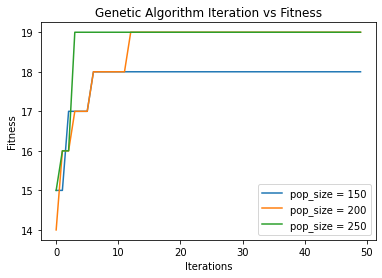

In [7]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Genetic Algorithm Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [12]:
#RCH RESTARTS=0
start = time.time()
best_state, best_fitness,fitness_curve = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=0, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.005000591278076172
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1]
16.0


In [16]:
#RCH RESTARTS=10
start = time.time()
best_state, best_fitness,fitness_curve_pro = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=10, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.07538723945617676
[0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
17.0


In [17]:
curve_RHC = fitness_curve_pro
fitness_RHC = best_fitness
time_RHC = end-start

In [10]:
#RCH RESTARTS=5
start = time.time()
best_state, best_fitness,fitness_curve_pro2 = mlrose_hiive.random_hill_climb(problem_fit, max_attempts=100, max_iters=100, restarts=5, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.03400826454162598
[0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1]
17.0


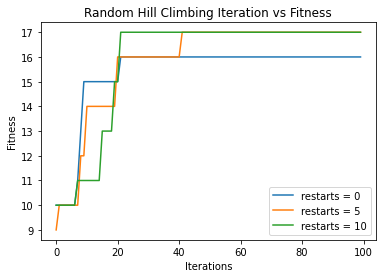

In [13]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='restarts = 0')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='restarts = 5')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='restarts = 10')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Random Hill Climbing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [5]:
#SA schedule = geomdecay
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.95, min_temp=1)
best_state, best_fitness, fitness_curve = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=1)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.09766721725463867
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
19.0


In [18]:
#SA schedule = geomdecay decay 0.75
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.75, min_temp=1)
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.024144649505615234
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
19.0


In [19]:
curve_SA = fitness_curve_pro
fitness_SA = best_fitness
time_SA = end-start

In [8]:
#SA schedule = geomdecay decay 0.55
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.55, min_temp=1)
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=3)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.22104454040527344
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
19.0


In [9]:
#SA schedule = geomdecay decay 0.35
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.35, min_temp=1)
best_state, best_fitness, fitness_curve_pro3 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=6)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.03201794624328613
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
19.0


In [10]:
#SA schedule = geomdecay decay 0.15
start = time.time()
schedule = mlrose_hiive.GeomDecay(init_temp=10, decay=0.15, min_temp=1)
best_state, best_fitness, fitness_curve_pro4 = mlrose_hiive.simulated_annealing(problem_fit, max_attempts=100, max_iters=inf, init_state=None, curve=True, random_state=5)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

0.054579973220825195
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
19.0


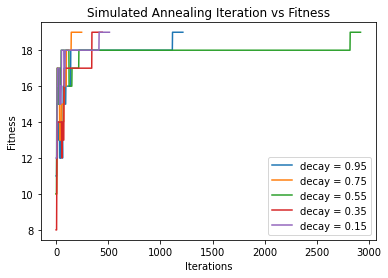

In [11]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='decay = 0.95')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='decay = 0.75')  # Plot more data on the axes...
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='decay = 0.55')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro3))), fitness_curve_pro3[:,0], label='decay = 0.35')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve_pro4))), fitness_curve_pro4[:,0], label='decay = 0.15')  # ... and some more.
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Simulated Annealing Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [24]:
#MIMIC POPSIZE = 200
start = time.time()
best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem_fit, pop_size=200, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

13.712368488311768
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
19.0


In [20]:
#MIMIC POPSIZE = 250
start = time.time()
best_state, best_fitness, fitness_curve_pro = mlrose_hiive.mimic(problem_fit, pop_size=250, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

16.126213550567627
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
19.0


In [21]:
curve_MIMIC = fitness_curve_pro
fitness_MIMIC = best_fitness
time_MIMIC = end - start

In [26]:
#MIMIC POPSIZE = 150
start = time.time()
best_state, best_fitness, fitness_curve_pro2 = mlrose_hiive.mimic(problem_fit, pop_size=150, keep_pct=0.2, max_attempts=100, max_iters=inf, curve=True, random_state=2)
end = time.time()
print(end-start)
print(best_state)
print(best_fitness)

13.154967308044434
[1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
18.0


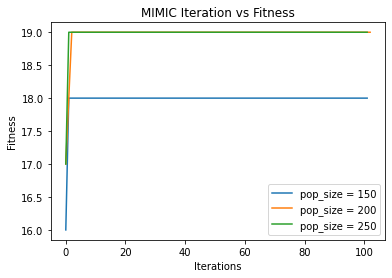

In [27]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(fitness_curve_pro2))), fitness_curve_pro2[:,0], label='pop_size = 150')  # ... and some more.
ax.plot(range(0,len(list(fitness_curve))), fitness_curve[:,0], label='pop_size = 200')  # Plot some data on the axes.
ax.plot(range(0,len(list(fitness_curve_pro))), fitness_curve_pro[:,0], label='pop_size = 250')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("MIMIC Iteration vs Fitness")  # Add a title to the axes.
ax.legend()  # Add a legend.

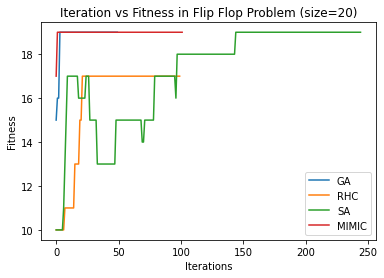

In [23]:
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(range(0,len(list(curve_GA))), curve_GA[:,0], label='GA')  # ... and some more.
ax.plot(range(0,len(list(curve_RHC))), curve_RHC[:,0], label='RHC')  # Plot some data on the axes.
ax.plot(range(0,len(list(curve_SA))), curve_SA[:,0], label='SA')  # Plot more data on the axes...
ax.plot(range(0,len(list(curve_MIMIC))), curve_MIMIC[:,0], label='MIMIC')  # Plot more data on the axes...
ax.set_xlabel('Iterations')  # Add an x-label to the axes.
ax.set_ylabel('Fitness')  # Add a y-label to the axes.
ax.set_title("Iteration vs Fitness in Flip Flop Problem (size=20)")  # Add a title to the axes.
ax.legend()  # Add a legend.

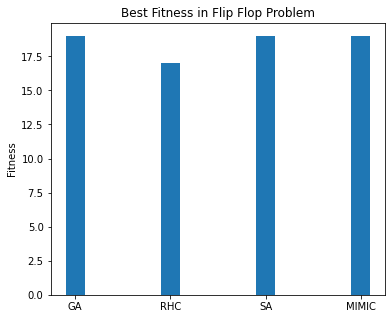

In [24]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA','MIMIC'] 
runtime_list = [fitness_GA,fitness_RHC,fitness_SA,fitness_MIMIC]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Fitness")
plt.title("Best Fitness in Flip Flop Problem")
plt.show()

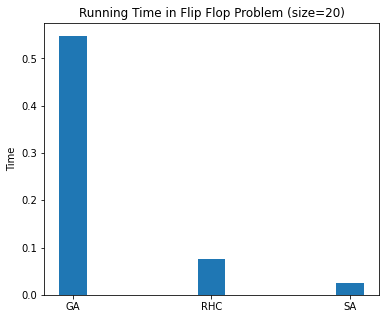

In [28]:
fig = plt.figure(figsize = (6, 5))
names = ['GA','RHC','SA'] 
runtime_list = [time_GA,time_RHC,time_SA]
# creating the bar plot
plt.bar(names,runtime_list, width = 0.2)
plt.ylabel("Time")
plt.title("Running Time in Flip Flop Problem (size=20)")
plt.show()